<a href="https://colab.research.google.com/github/pscalwin/Tumor-Gal3-Clinical-data/blob/main/Oral%20Tumor_Cell_Classification_using_MANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import scipy as stats
from IPython.display import display_html 
# import the csv file directly from local dis
from google.colab import drive
drive.mount('/content/gdrive') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/gdrive


In [ ]:
data =pd.read_csv('gdrive/My Drive/Tumor evaluation/Raw data Tumor evaluation.csv')
data 

,Slide No,Category,Grade of OSCC,Field,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,B-122/19,Severe,EI,1,1,100,4,114
1,B-122/19,Severe,EI,2,1,100,4,122
2,B-122/19,Severe,EI,3,1,100,4,100
3,B-31/19,Severe,EI,1,1,60,3,65
4,B-31/19,Severe,EI,2,1,50,2,50
...,...,...,...,...,...,...,...,...
140,B-102/19,Normal,Normal,2,2,80,8,170
141,B-102/19,Normal,Normal,3,2,80,8,180
142,B-107/19,Normal,Normal,1,3,75,9,155
143,B-107/19,Normal,Normal,2,3,90,12,205


In [ ]:
data['Counts'] = data.groupby(['Grade of OSCC'])['H score'].transform('count')
data

,Slide No,Category,Grade of OSCC,Field,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,B-122/19,Severe,EI,1,1,100,4,114,6
1,B-122/19,Severe,EI,2,1,100,4,122,6
2,B-122/19,Severe,EI,3,1,100,4,100,6
3,B-31/19,Severe,EI,1,1,60,3,65,6
4,B-31/19,Severe,EI,2,1,50,2,50,6
...,...,...,...,...,...,...,...,...,...
140,B-102/19,Normal,Normal,2,2,80,8,170,19
141,B-102/19,Normal,Normal,3,2,80,8,180,19
142,B-107/19,Normal,Normal,1,3,75,9,155,19
143,B-107/19,Normal,Normal,2,3,90,12,205,19


In [ ]:
data = data. groupby('Grade of OSCC', as_index=False, sort = False)['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score', 'Counts'].mean()
data

<ipython-input-6-14d6de770ac8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data. groupby('Grade of OSCC', as_index=False, sort = False)['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score', 'Counts'].mean()


,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,EI,1.000000,75.000000,3.166667,81.833333,6.0
1,Mod,1.305556,68.472222,4.222222,96.527778,36.0
2,well,1.652174,60.695652,4.869565,108.739130,23.0
3,mild,1.710526,67.236842,5.526316,118.000000,38.0
4,reasonable,1.533333,65.933333,4.533333,109.666667,15.0
5,severe,1.250000,37.500000,2.500000,54.375000,8.0
6,Normal,1.894737,70.000000,6.842105,135.210526,19.0


In [ ]:
data1 = data.loc[data.index.repeat(data['Counts'])].reset_index(drop=True)
data1

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,EI,1.000000,75.0,3.166667,81.833333,6.0
1,EI,1.000000,75.0,3.166667,81.833333,6.0
2,EI,1.000000,75.0,3.166667,81.833333,6.0
3,EI,1.000000,75.0,3.166667,81.833333,6.0
4,EI,1.000000,75.0,3.166667,81.833333,6.0
...,...,...,...,...,...,...
140,Normal,1.894737,70.0,6.842105,135.210526,19.0
141,Normal,1.894737,70.0,6.842105,135.210526,19.0
142,Normal,1.894737,70.0,6.842105,135.210526,19.0
143,Normal,1.894737,70.0,6.842105,135.210526,19.0


In [ ]:
data =pd.read_csv('gdrive/My Drive/Tumor evaluation/Raw data Tumor evaluation.csv')
data2 = pd.DataFrame(data,columns=['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score'])
data2

,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,1,100,4,114
1,1,100,4,122
2,1,100,4,100
3,1,60,3,65
4,1,50,2,50
...,...,...,...,...
140,2,80,8,170
141,2,80,8,180
142,3,75,9,155
143,3,90,12,205


In [ ]:
residual = data2[['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']]-data1[['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']]
residual

,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,0.000000,25.0,0.833333,32.166667
1,0.000000,25.0,0.833333,40.166667
2,0.000000,25.0,0.833333,18.166667
3,0.000000,-15.0,-0.166667,-16.833333
4,0.000000,-25.0,-1.166667,-31.833333
...,...,...,...,...
140,0.105263,10.0,1.157895,34.789474
141,0.105263,10.0,1.157895,44.789474
142,1.105263,5.0,2.157895,19.789474
143,1.105263,20.0,5.157895,69.789474


In [ ]:
data3 = pd.DataFrame(data,columns=['Grade of OSCC'])
data3 = data3.join(residual)
data3

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,EI,0.000000,25.0,0.833333,32.166667
1,EI,0.000000,25.0,0.833333,40.166667
2,EI,0.000000,25.0,0.833333,18.166667
3,EI,0.000000,-15.0,-0.166667,-16.833333
4,EI,0.000000,-25.0,-1.166667,-31.833333
...,...,...,...,...,...
140,Normal,0.105263,10.0,1.157895,34.789474
141,Normal,0.105263,10.0,1.157895,44.789474
142,Normal,1.105263,5.0,2.157895,19.789474
143,Normal,1.105263,20.0,5.157895,69.789474


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='rainbow')

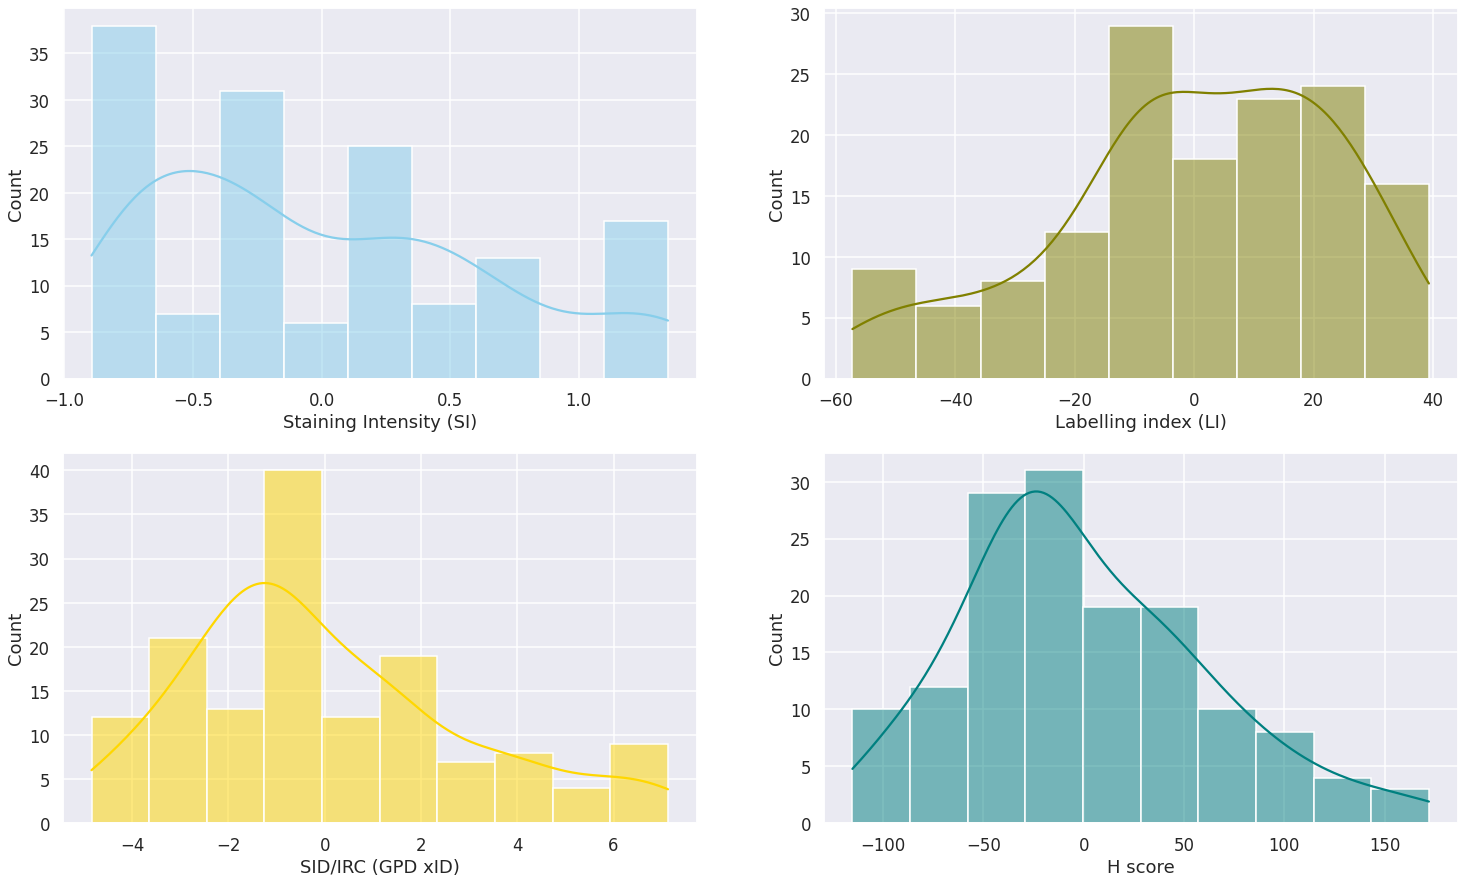

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

sns.histplot(data3, x="Staining Intensity (SI)", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data3, x="Labelling index (LI)", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data3, x="SID/IRC (GPD xID)", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data3, x="H score", kde=True, color="teal", ax=axs[1, 1])

plt.show()

In [ ]:
#from scipy.stats import bartlett
#dataset = pd.read_csv('gdrive/My Drive/Tumor evaluation/Raw data Tumor evaluation.csv')
  
# data which contains sepal width of the three species
#dataxxx = [dataset[dataset['Grade of OSCC'] == "EI"]['Staining Intensity (SI)'], dataset[dataset['Grade of OSCC'] == "Mod"]['Staining Intensity (SI)'],dataset[dataset['Grade of OSCC'] == "well"]['Staining Intensity (SI)']]
  
# performing Bartlett's test
#test_statistic, p_value = stats.bartlett(dataxxx[0], dataxxx[1], dataxxx[2])
  
#print(test_statistic, p_value)

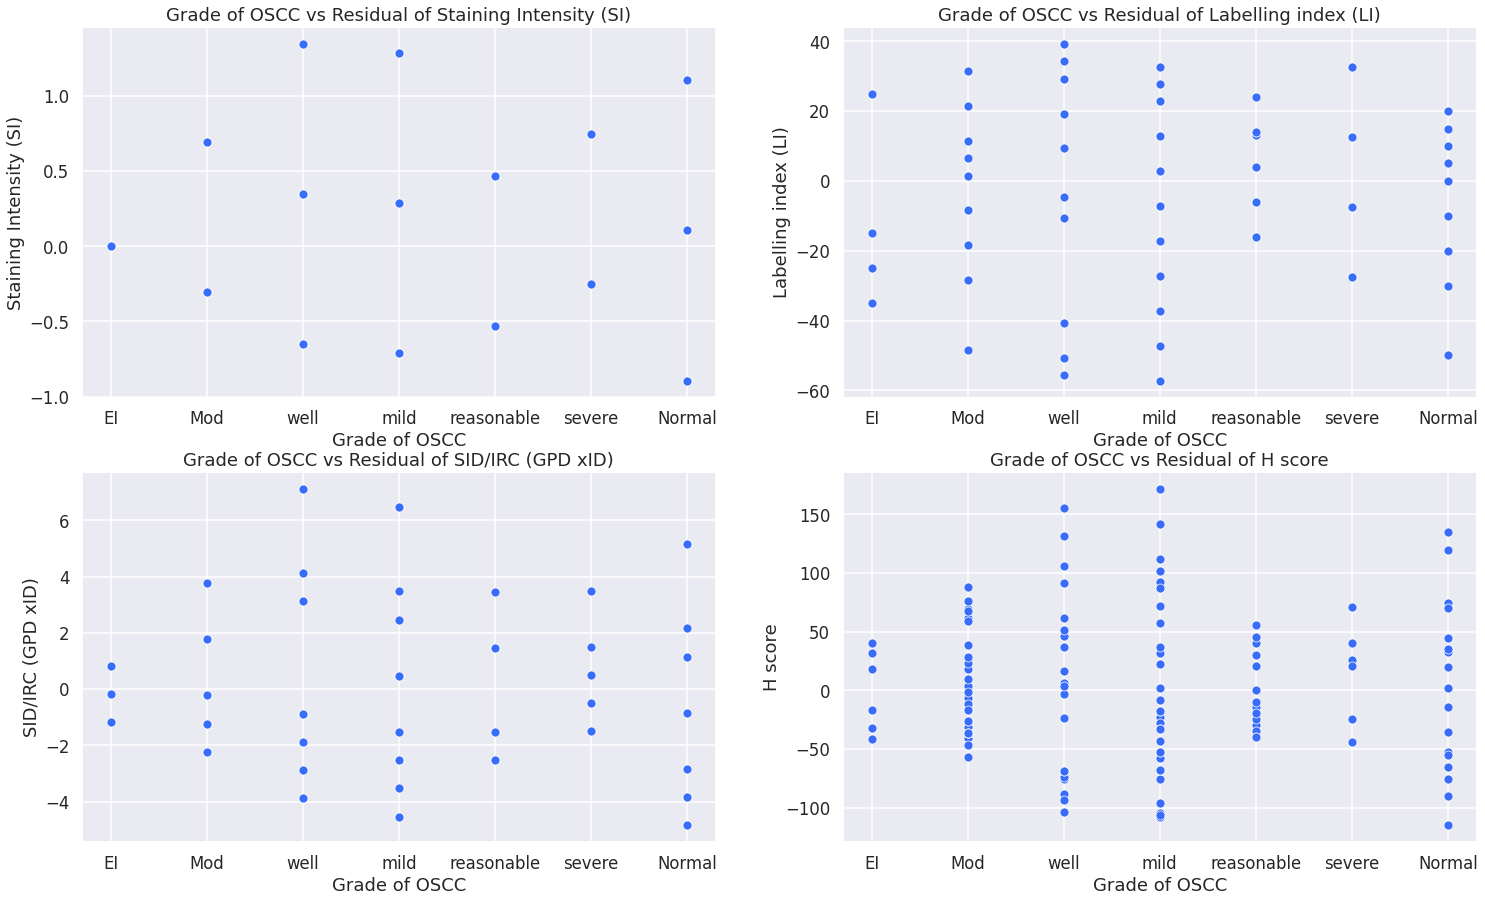

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25,15))
sns.scatterplot(data=data3, x="Grade of OSCC", y = "Staining Intensity (SI)", ax=ax[0,0])
sns.scatterplot(data=data3, x="Grade of OSCC", y = "Labelling index (LI)", ax=ax[0,1])
sns.scatterplot(data=data3, x="Grade of OSCC", y = "SID/IRC (GPD xID)", ax=ax[1,0])
sns.scatterplot(data=data3, x="Grade of OSCC", y = "H score", ax=ax[1,1])
ax[0,0].set_title("Grade of OSCC vs Residual of Staining Intensity (SI)")
ax[0,1].set_title("Grade of OSCC vs Residual of Labelling index (LI)")
ax[1,0].set_title("Grade of OSCC vs Residual of SID/IRC (GPD xID)")
ax[1,1].set_title("Grade of OSCC vs Residual of H score")
plt.show()

In [ ]:
from sklearn.preprocessing import FunctionTransformer #MinMaxScaler #StandardScaler
scaler = FunctionTransformer(np.log10, validate=True) #MinMaxScaler() #StandardScaler()
data4 = pd.DataFrame(data,columns=['Labelling index (LI)', 'H score'])
data4[['Labelling index (LI)', 'H score']]= scaler.fit_transform(data4[['Labelling index (LI)', 'H score']])
data4

,Labelling index (LI),H score
0,2.000000,2.056905
1,2.000000,2.086360
2,2.000000,2.000000
3,1.778151,1.812913
4,1.698970,1.698970
...,...,...
140,1.903090,2.230449
141,1.903090,2.255273
142,1.875061,2.190332
143,1.954243,2.311754


In [ ]:
from sklearn.preprocessing import FunctionTransformer
scaler = FunctionTransformer(np.log2, validate=True)
data5 = pd.DataFrame(data,columns=['SID/IRC (GPD xID)'])
data5[['SID/IRC (GPD xID)']]= scaler.fit_transform(data5[['SID/IRC (GPD xID)']])
data5

,SID/IRC (GPD xID)
0,2.000000
1,2.000000
2,2.000000
3,1.584963
4,1.000000
...,...
140,3.000000
141,3.000000
142,3.169925
143,3.584963


In [ ]:
data6 = data5.join(data4)
data7 = data6.join(data['Grade of OSCC'])
data8 = data7.join(data['Staining Intensity (SI)'])
data8 =pd.DataFrame(data8,columns=['Grade of OSCC', 'Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score'])
data8
datamissed = data8.copy()

In [ ]:
data8['Counts'] = data8.groupby(['Grade of OSCC'])['H score'].transform('count')
data8

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,EI,1,2.000000,2.000000,2.056905,6
1,EI,1,2.000000,2.000000,2.086360,6
2,EI,1,2.000000,2.000000,2.000000,6
3,EI,1,1.778151,1.584963,1.812913,6
4,EI,1,1.698970,1.000000,1.698970,6
...,...,...,...,...,...,...
140,Normal,2,1.903090,3.000000,2.230449,19
141,Normal,2,1.903090,3.000000,2.255273,19
142,Normal,3,1.875061,3.169925,2.190332,19
143,Normal,3,1.954243,3.584963,2.311754,19


In [ ]:
data9 = data8.copy()
data9

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,EI,1,2.000000,2.000000,2.056905,6
1,EI,1,2.000000,2.000000,2.086360,6
2,EI,1,2.000000,2.000000,2.000000,6
3,EI,1,1.778151,1.584963,1.812913,6
4,EI,1,1.698970,1.000000,1.698970,6
...,...,...,...,...,...,...
140,Normal,2,1.903090,3.000000,2.230449,19
141,Normal,2,1.903090,3.000000,2.255273,19
142,Normal,3,1.875061,3.169925,2.190332,19
143,Normal,3,1.954243,3.584963,2.311754,19


In [ ]:
data8 = data8. groupby('Grade of OSCC', as_index=False,sort = False)['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score','Counts'].mean()
data8

<ipython-input-19-50e06672a7af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data8 = data8. groupby('Grade of OSCC', as_index=False,sort = False)['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score','Counts'].mean()


,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,EI,1.000000,1.846530,1.597494,1.876201,6.0
1,Mod,1.305556,1.817582,1.940810,1.953042,36.0
2,well,1.652174,1.652189,1.960641,1.874784,23.0
3,mild,1.710526,1.772474,2.130629,1.954646,38.0
4,reasonable,1.533333,1.810655,2.028973,2.021936,15.0
5,severe,1.250000,1.445657,1.021241,1.541238,8.0
6,Normal,1.894737,1.821973,2.518401,2.053991,19.0


In [ ]:
data10 = data8.loc[data8.index.repeat(data8['Counts'])].reset_index(drop=True)
data10

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,Counts
0,EI,1.000000,1.846530,1.597494,1.876201,6.0
1,EI,1.000000,1.846530,1.597494,1.876201,6.0
2,EI,1.000000,1.846530,1.597494,1.876201,6.0
3,EI,1.000000,1.846530,1.597494,1.876201,6.0
4,EI,1.000000,1.846530,1.597494,1.876201,6.0
...,...,...,...,...,...,...
140,Normal,1.894737,1.821973,2.518401,2.053991,19.0
141,Normal,1.894737,1.821973,2.518401,2.053991,19.0
142,Normal,1.894737,1.821973,2.518401,2.053991,19.0
143,Normal,1.894737,1.821973,2.518401,2.053991,19.0


In [ ]:
residual2 = data9[['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']]-data10[['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']]
residual2

,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,0.000000,0.153470,0.402506,0.180704
1,0.000000,0.153470,0.402506,0.210158
2,0.000000,0.153470,0.402506,0.123799
3,0.000000,-0.068379,-0.012531,-0.063288
4,0.000000,-0.147560,-0.597494,-0.177231
...,...,...,...,...
140,0.105263,0.081117,0.481599,0.176458
141,0.105263,0.081117,0.481599,0.201282
142,1.105263,0.053089,0.651524,0.136341
143,1.105263,0.132270,1.066561,0.257763


In [ ]:
data10 = pd.DataFrame(data10,columns=['Grade of OSCC'])
data10 = data10.join(residual2)
data10

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,EI,0.000000,0.153470,0.402506,0.180704
1,EI,0.000000,0.153470,0.402506,0.210158
2,EI,0.000000,0.153470,0.402506,0.123799
3,EI,0.000000,-0.068379,-0.012531,-0.063288
4,EI,0.000000,-0.147560,-0.597494,-0.177231
...,...,...,...,...,...
140,Normal,0.105263,0.081117,0.481599,0.176458
141,Normal,0.105263,0.081117,0.481599,0.201282
142,Normal,1.105263,0.053089,0.651524,0.136341
143,Normal,1.105263,0.132270,1.066561,0.257763


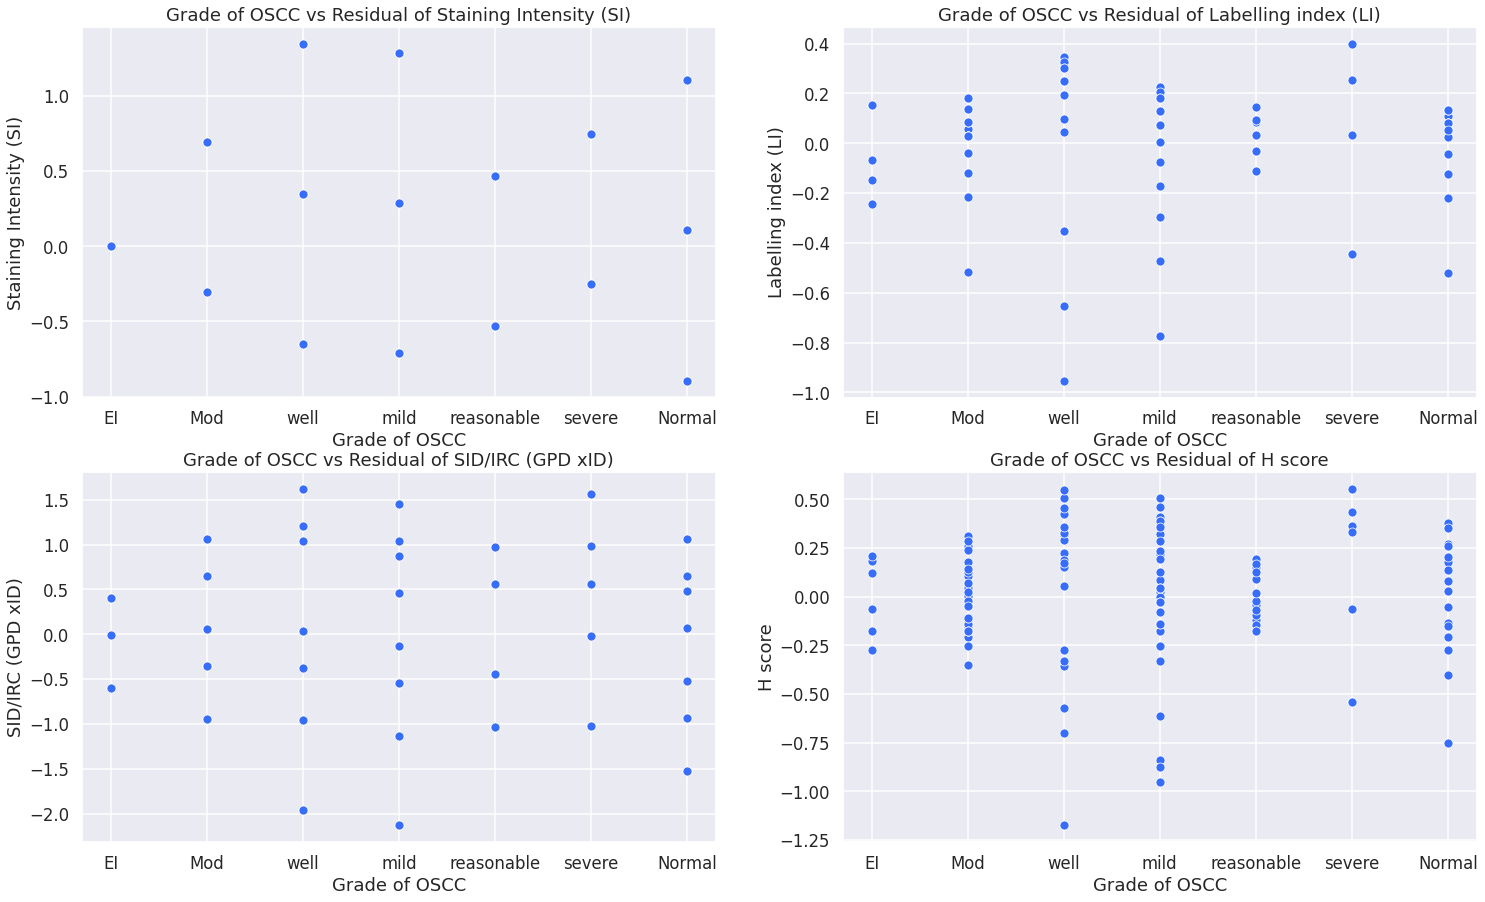

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(25,15))
sns.scatterplot(data=data10, x="Grade of OSCC", y = "Staining Intensity (SI)", ax=ax[0,0])
sns.scatterplot(data=data10, x="Grade of OSCC", y = "Labelling index (LI)", ax=ax[0,1])
sns.scatterplot(data=data10, x="Grade of OSCC", y = "SID/IRC (GPD xID)", ax=ax[1,0])
sns.scatterplot(data=data10, x="Grade of OSCC", y = "H score", ax=ax[1,1])
ax[0,0].set_title("Grade of OSCC vs Residual of Staining Intensity (SI)")
ax[0,1].set_title("Grade of OSCC vs Residual of Labelling index (LI)")
ax[1,0].set_title("Grade of OSCC vs Residual of SID/IRC (GPD xID)")
ax[1,1].set_title("Grade of OSCC vs Residual of H score")
plt.show()

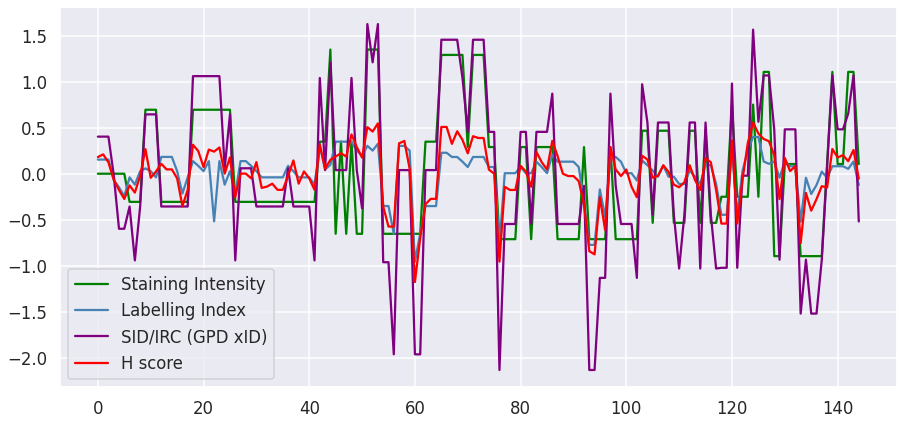

In [ ]:
plt.plot(data10['Staining Intensity (SI)'], color='green',  marker='', markerfacecolor='blue', markersize=12, label = "Staining Intensity")
plt.plot(data10['Labelling index (LI)'], color='steelblue',  marker='', markerfacecolor='brown', markersize=12, label = "Labelling Index")
plt.plot(data10['SID/IRC (GPD xID)'], color='purple',  marker='', markerfacecolor='pink', markersize=12, label = "SID/IRC (GPD xID)")
plt.plot(data10['H score'], color='red',  marker='', markerfacecolor='red', markersize=12, label = "H score")
plt.rcParams['figure.figsize'] = [15, 7]
#display plot
plt.legend()
plt.show()

In [ ]:
data11 =pd.DataFrame(data10, columns = ['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score'])
data11

,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,0.000000,0.153470,0.402506,0.180704
1,0.000000,0.153470,0.402506,0.210158
2,0.000000,0.153470,0.402506,0.123799
3,0.000000,-0.068379,-0.012531,-0.063288
4,0.000000,-0.147560,-0.597494,-0.177231
...,...,...,...,...
140,0.105263,0.081117,0.481599,0.176458
141,0.105263,0.081117,0.481599,0.201282
142,1.105263,0.053089,0.651524,0.136341
143,1.105263,0.132270,1.066561,0.257763


In [ ]:
# Calculate Mahalanobis Distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data11)
    if not cov:
        cov = np.cov(data11.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
data11['mahalanobis'] = mahalanobis(x=data11, data=data11[['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']])

#display first five rows of dataframe
data11.head()

,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,mahalanobis
0,0.0,0.153470,0.402506,0.180704,0.792302
1,0.0,0.153470,0.402506,0.210158,0.985267
2,0.0,0.153470,0.402506,0.123799,1.071699
3,0.0,-0.068379,-0.012531,-0.063288,0.246648
4,0.0,-0.147560,-0.597494,-0.177231,2.321370


In [ ]:
from scipy.stats import chi2

#calculate p-value for each mahalanobis distance 
data11['p'] = 1 - chi2.cdf(data11['mahalanobis'], 3)

#display p-values for first five rows in dataframe
data11

,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score,mahalanobis,p
0,0.000000,0.153470,0.402506,0.180704,0.792302,0.851307
1,0.000000,0.153470,0.402506,0.210158,0.985267,0.804817
2,0.000000,0.153470,0.402506,0.123799,1.071699,0.783910
3,0.000000,-0.068379,-0.012531,-0.063288,0.246648,0.969729
4,0.000000,-0.147560,-0.597494,-0.177231,2.321370,0.508439
...,...,...,...,...,...,...
140,0.105263,0.081117,0.481599,0.176458,1.365358,0.713675
141,0.105263,0.081117,0.481599,0.201282,1.761503,0.623348
142,1.105263,0.053089,0.651524,0.136341,6.294241,0.098140
143,1.105263,0.132270,1.066561,0.257763,3.430908,0.329834


In [ ]:
outlierIndexes = np.where(data11['p'] < 0.01 )

print('--- Index of Outliers ----')
print(outlierIndexes)

--- Index of Outliers ----
(array([ 22,  46,  56,  60, 128]),)


In [ ]:
datamissed.drop([22,  46,  56,  60, 128], axis=0, inplace=True)
datamissed = datamissed.reset_index()
datamissed.drop('index', axis=1, inplace=True)
datamissed

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,EI,1,2.000000,2.000000,2.056905
1,EI,1,2.000000,2.000000,2.086360
2,EI,1,2.000000,2.000000,2.000000
3,EI,1,1.778151,1.584963,1.812913
4,EI,1,1.698970,1.000000,1.698970
...,...,...,...,...,...
135,Normal,2,1.903090,3.000000,2.230449
136,Normal,2,1.903090,3.000000,2.255273
137,Normal,3,1.875061,3.169925,2.190332
138,Normal,3,1.954243,3.584963,2.311754


In [ ]:
data10 = pd.DataFrame(datamissed,columns=['Grade of OSCC'])
data10

,Grade of OSCC
0,EI
1,EI
2,EI
3,EI
4,EI
...,...
135,Normal
136,Normal
137,Normal
138,Normal


In [ ]:
def intify(s):
    u = np.unique(s)
    return s.map({k: i for i, k in enumerate(u)})

data10 = data10.apply(intify)
data10

,Grade of OSCC
0,0
1,0
2,0
3,0
4,0
...,...
135,2
136,2
137,2
138,2


In [ ]:
data11 = pd.DataFrame(datamissed,columns=['Staining Intensity (SI)', 'Labelling index (LI)', 'SID/IRC (GPD xID)','H score'])
data11 = data10.join(data11)
data11

,Grade of OSCC,Staining Intensity (SI),Labelling index (LI),SID/IRC (GPD xID),H score
0,0,1,2.000000,2.000000,2.056905
1,0,1,2.000000,2.000000,2.086360
2,0,1,2.000000,2.000000,2.000000
3,0,1,1.778151,1.584963,1.812913
4,0,1,1.698970,1.000000,1.698970
...,...,...,...,...,...
135,2,2,1.903090,3.000000,2.230449
136,2,2,1.903090,3.000000,2.255273
137,2,3,1.875061,3.169925,2.190332
138,2,3,1.954243,3.584963,2.311754


In [ ]:
data11.columns = data11.columns.str.replace(' ', '')
data11.columns = data11.columns.str.replace('(', '')
data11.columns = data11.columns.str.replace(')', '')
data11.columns = data11.columns.str.replace('/', '')

<ipython-input-37-475d4aafccf2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data11.columns = data11.columns.str.replace('(', '')
<ipython-input-37-475d4aafccf2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data11.columns = data11.columns.str.replace(')', '')


In [ ]:
data11

,GradeofOSCC,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore
0,0,1,2.000000,2.000000,2.056905
1,0,1,2.000000,2.000000,2.086360
2,0,1,2.000000,2.000000,2.000000
3,0,1,1.778151,1.584963,1.812913
4,0,1,1.698970,1.000000,1.698970
...,...,...,...,...,...
135,2,2,1.903090,3.000000,2.230449
136,2,2,1.903090,3.000000,2.255273
137,2,3,1.875061,3.169925,2.190332
138,2,3,1.954243,3.584963,2.311754


In [ ]:
data11
datatoresi = data11.copy()
datatoresi

,GradeofOSCC,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore
0,0,1,2.000000,2.000000,2.056905
1,0,1,2.000000,2.000000,2.086360
2,0,1,2.000000,2.000000,2.000000
3,0,1,1.778151,1.584963,1.812913
4,0,1,1.698970,1.000000,1.698970
...,...,...,...,...,...
135,2,2,1.903090,3.000000,2.230449
136,2,2,1.903090,3.000000,2.255273
137,2,3,1.875061,3.169925,2.190332
138,2,3,1.954243,3.584963,2.311754


In [ ]:
#fit simple linear regression model
model = ols('GradeofOSCC ~ StainingIntensitySI', data=data11).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            GradeofOSCC   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.025
Date:                Sun, 22 Jan 2023   Prob (F-statistic):             0.0842
Time:                        17:45:46   Log-Likelihood:                -276.88
No. Observations:                 140   AIC:                             557.8
Df Residuals:                     138   BIC:                             563.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.3168    

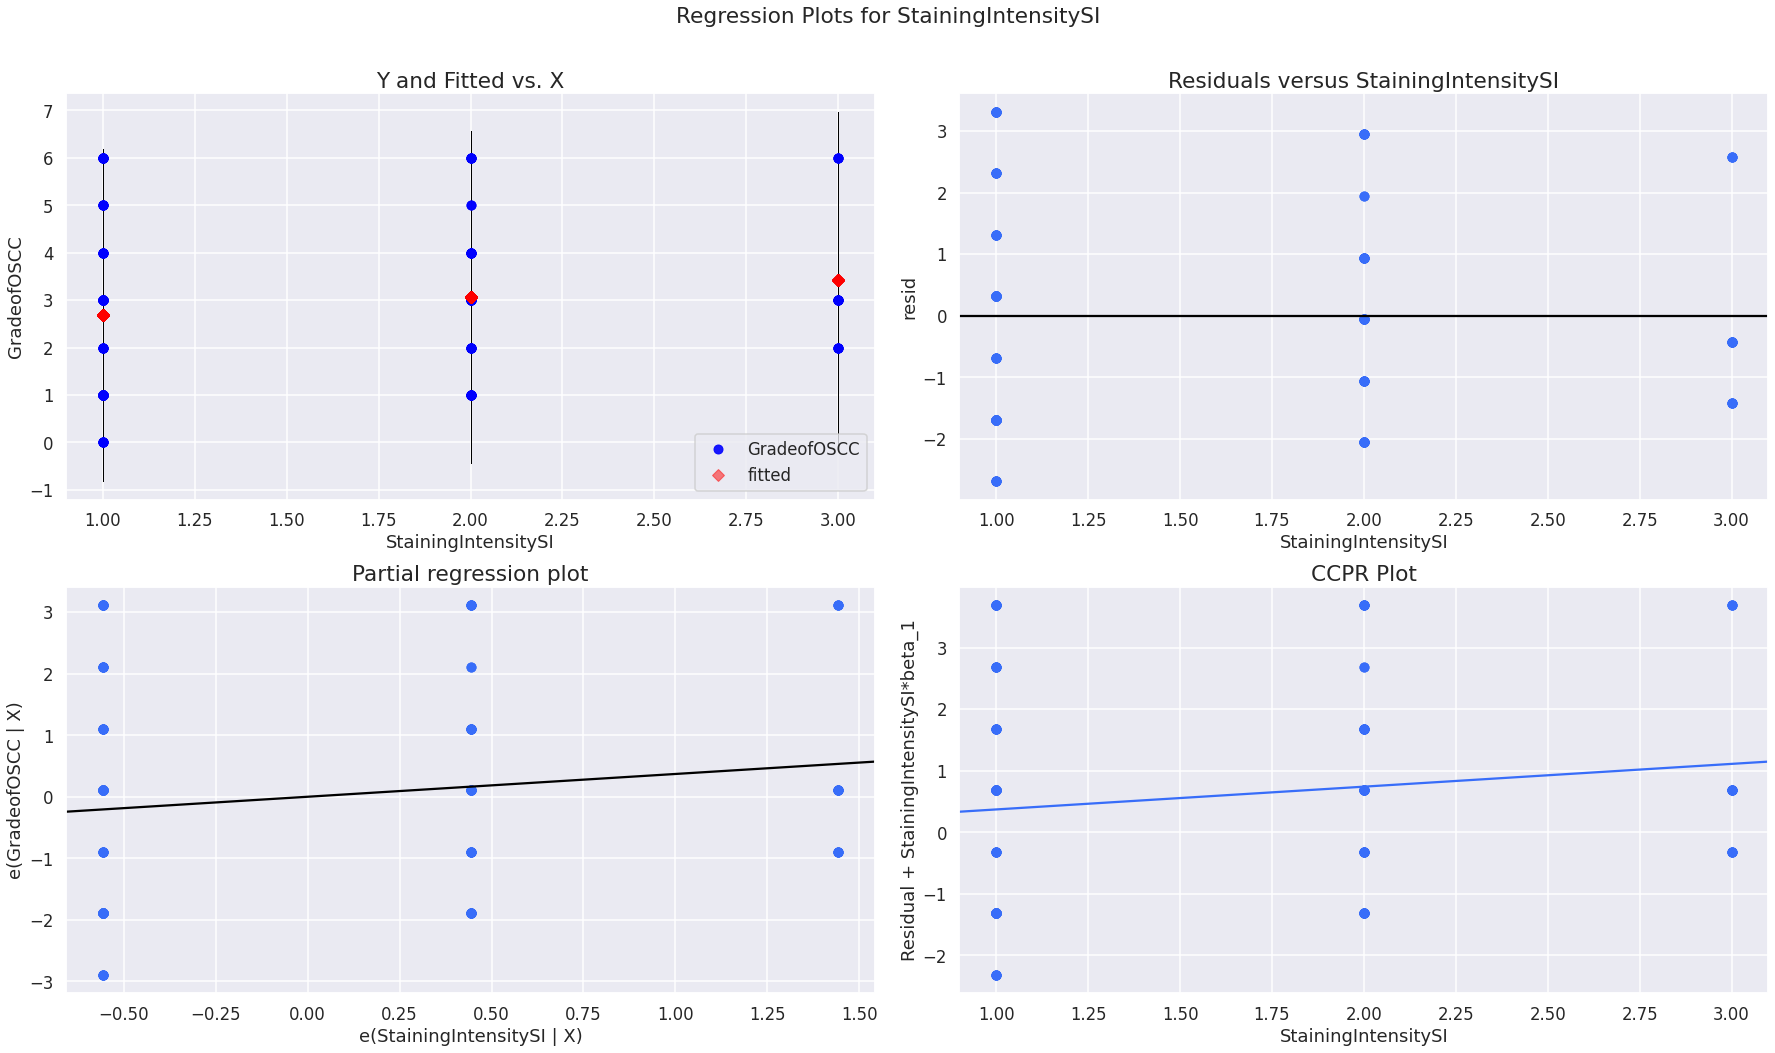

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
fig = plt.figure(figsize=(25,15))

#produce regression plots
fig1 = sm.graphics.plot_regress_exog(model, 'StainingIntensitySI', fig=fig)

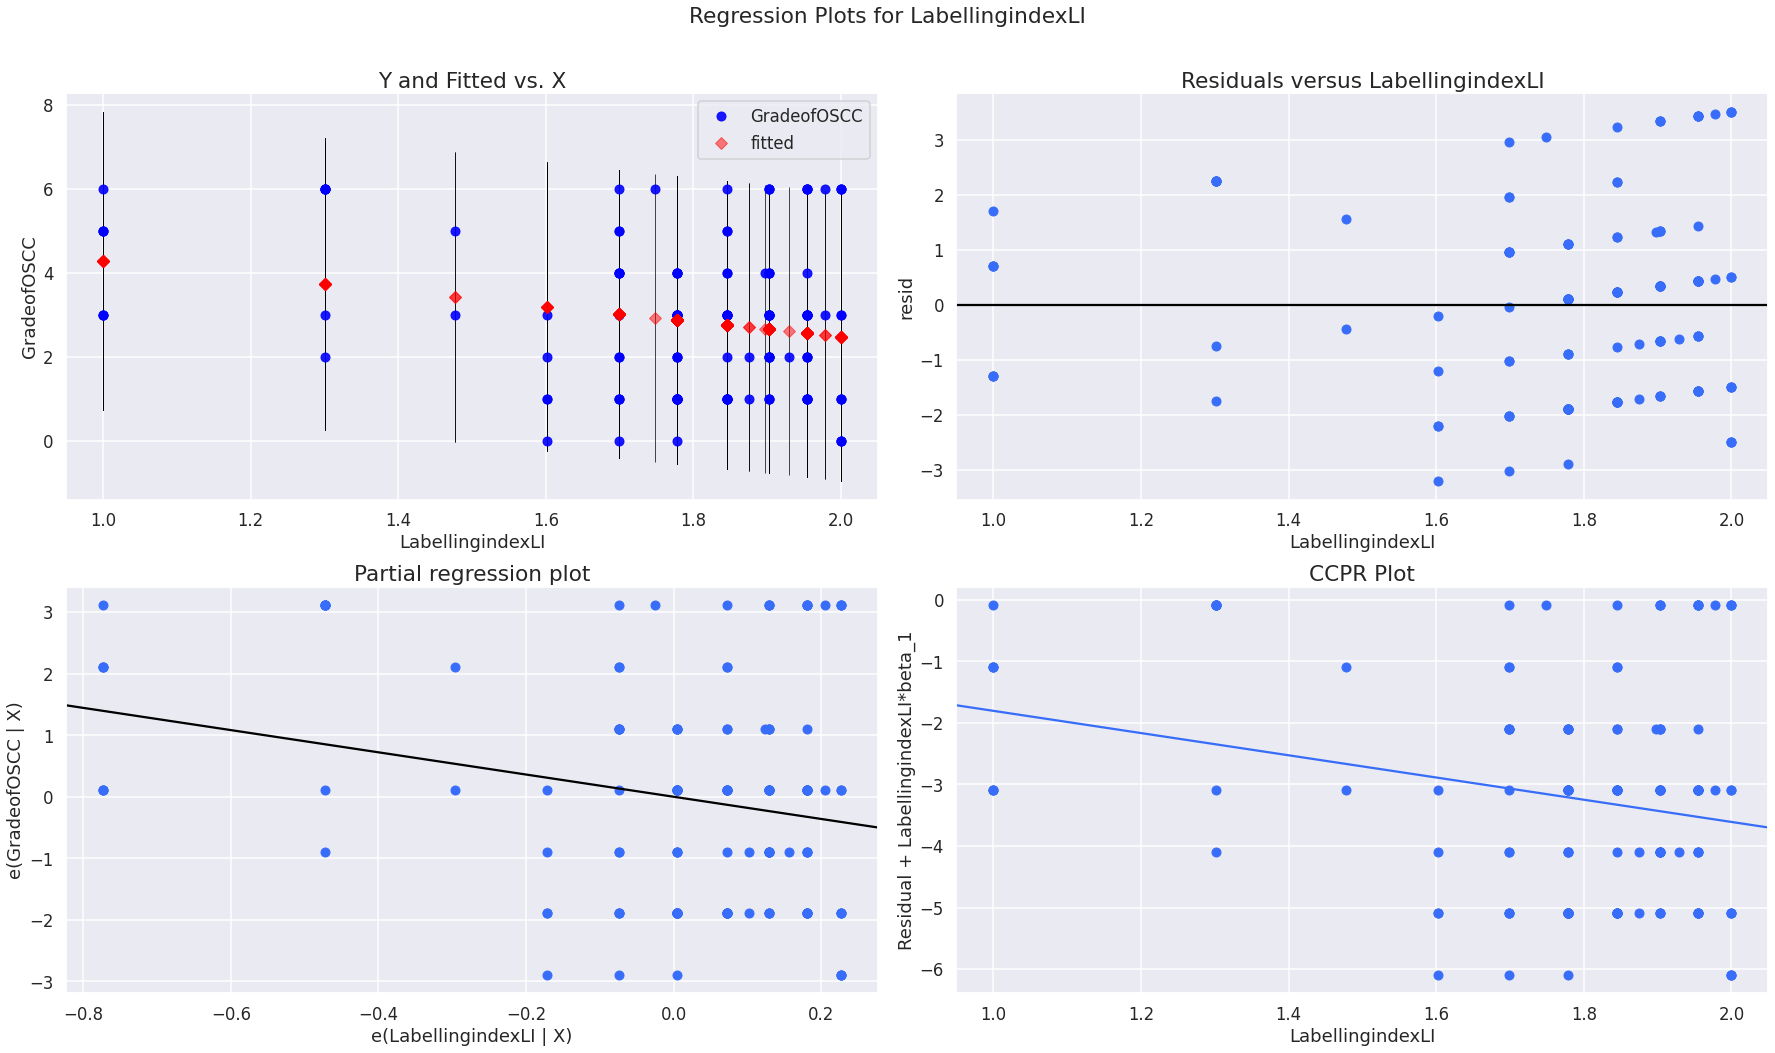

In [ ]:
model = ols('GradeofOSCC ~ LabellingindexLI', data=data11).fit()
fig = plt.figure(figsize=(25,15))
fig2 = sm.graphics.plot_regress_exog(model, 'LabellingindexLI', fig=fig)

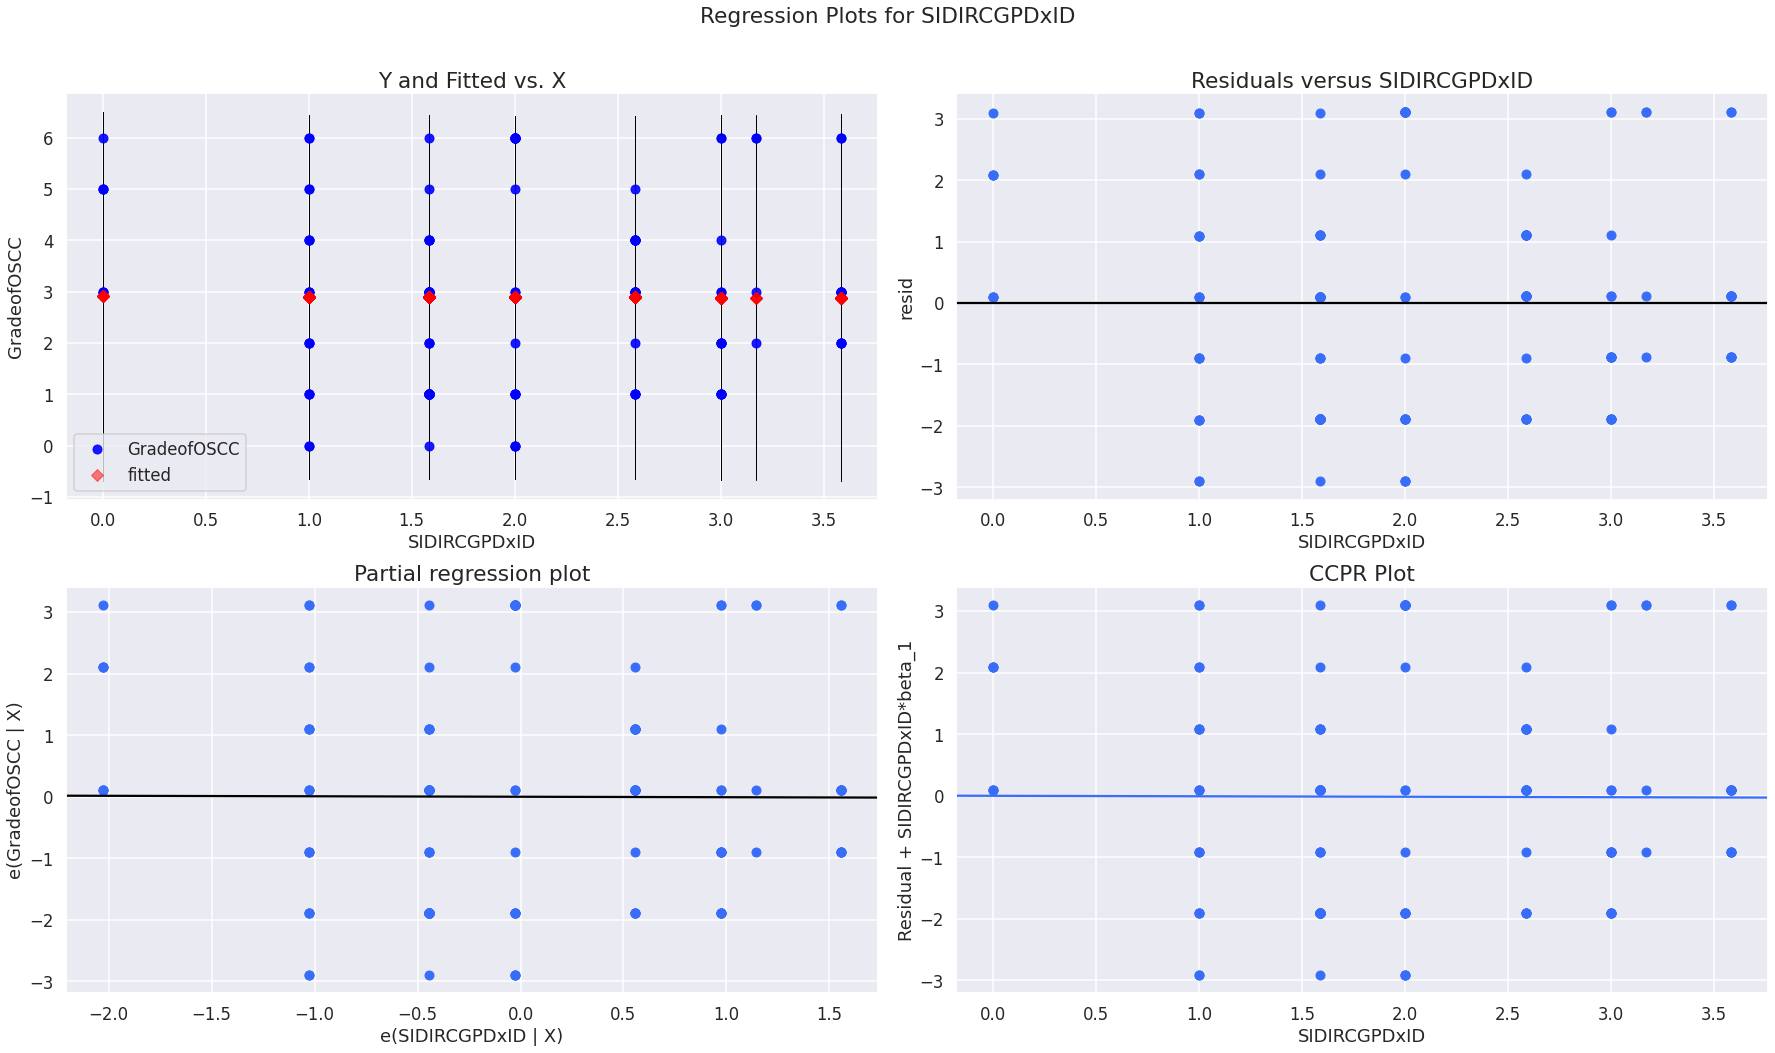

In [ ]:
model = ols('GradeofOSCC ~ SIDIRCGPDxID', data=data11).fit()
fig = plt.figure(figsize=(25,15))
fig2 = sm.graphics.plot_regress_exog(model, 'SIDIRCGPDxID', fig=fig)

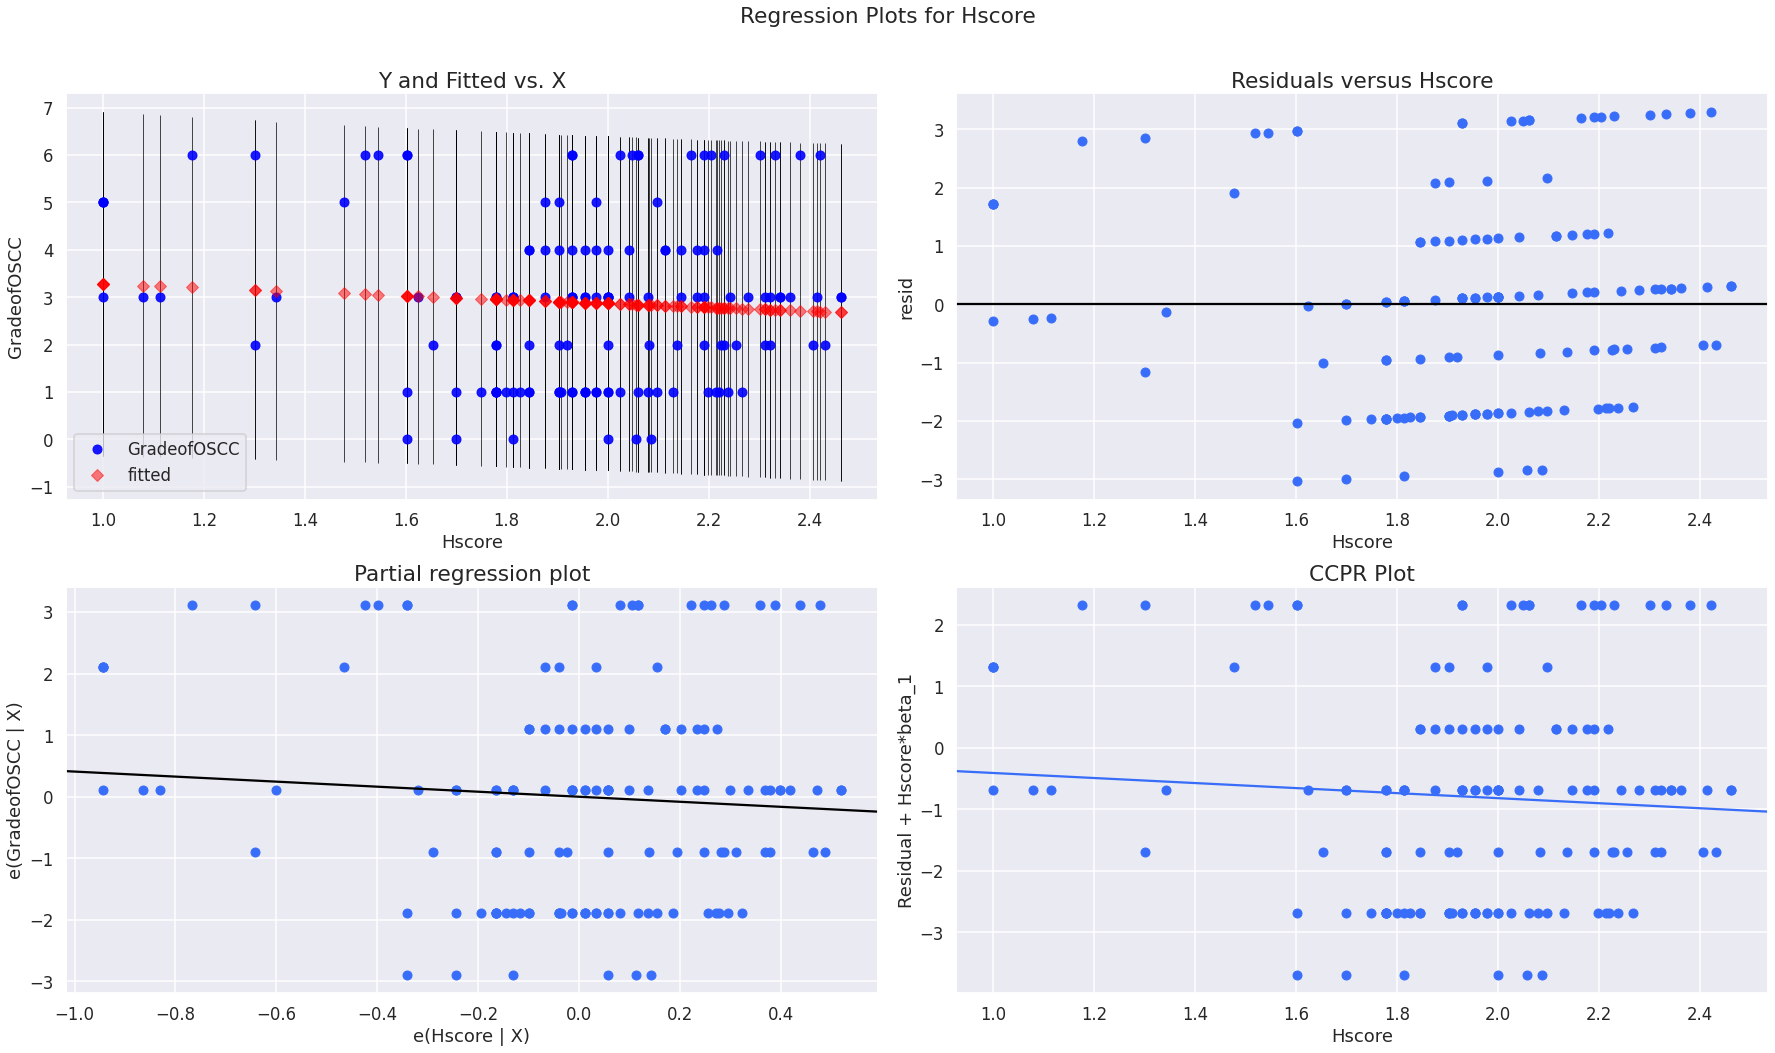

In [ ]:
model = ols('GradeofOSCC ~ Hscore', data=data11).fit()
fig = plt.figure(figsize=(25,15))
fig2 = sm.graphics.plot_regress_exog(model, 'Hscore', fig=fig)

In [ ]:
data11['Counts'] = data11.groupby(['GradeofOSCC'])['Hscore'].transform('count')
data11

,GradeofOSCC,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore,Counts
0,0,1,2.000000,2.000000,2.056905,6
1,0,1,2.000000,2.000000,2.086360,6
2,0,1,2.000000,2.000000,2.000000,6
3,0,1,1.778151,1.584963,1.812913,6
4,0,1,1.698970,1.000000,1.698970,6
...,...,...,...,...,...,...
135,2,2,1.903090,3.000000,2.230449,18
136,2,2,1.903090,3.000000,2.255273,18
137,2,3,1.875061,3.169925,2.190332,18
138,2,3,1.954243,3.584963,2.311754,18


In [ ]:
data11 = data11. groupby('GradeofOSCC', as_index=False,sort = False)['StainingIntensitySI', 'LabellingindexLI',  'SIDIRCGPDxID' , 'Hscore','Counts'].mean()
data11
datarrepeat =data11.copy()

<ipython-input-46-c91e7113e1df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data11 = data11. groupby('GradeofOSCC', as_index=False,sort = False)['StainingIntensitySI', 'LabellingindexLI',  'SIDIRCGPDxID' , 'Hscore','Counts'].mean()


In [ ]:
from pandas.core.groupby.ops import DataFrame
datagm = DataFrame (data11,columns=['StainingIntensitySI', 'LabellingindexLI',  'SIDIRCGPDxID' , 'Hscore']).transpose()
#datagm = DataFrame(datagm,columns=['0','1','2','3','4','5','6'])
#del datagm[datagm.columns[6]]

#df1 = pd.DataFrame({ 'aa': [0,0,0,0,0,0,0],'bb': [0,0,0,0,0,0,0],'cc': [0,0,0,0,0,0,0],'dd': [0,0,0,0,0,0,0]})
#datagm = datagm.join(df1).transpose()
datagm.reset_index(drop=True, inplace=True)
datagm

,0,1,2,3,4,5,6
0,1.000000,1.285714,1.700000,1.710526,1.533333,1.250000,1.944444
1,1.846530,1.832341,1.715068,1.772474,1.810655,1.445657,1.814624
2,1.597494,1.910548,2.154737,2.130629,2.028973,1.021241,2.491646
3,1.876201,1.946182,1.951156,1.954646,2.021936,1.541238,2.042809


In [ ]:
datac = pd.DataFrame({'1':[.167,.167,.167,.167,.167,.167,-1],'2':[.333,.333,.333,-.333,-.333,-.333,0],'3':[.5,.5,-1,0,0,0,0],'4':[.5,-1,.5,0,0,0,0],'5':[-1,.5,.5,0,0,0,0],'6':[0,0,0,.5,.5,-1,0],'7':[0,0,0,.5,-1,.5,0],'8':[0,0,0,-1,.5,.5,0]})
#datac.join(data8[['Counts']])
datac


,1,2,3,4,5,6,7,8
0,0.167,0.333,0.5,0.5,-1.0,0.0,0.0,0.0
1,0.167,0.333,0.5,-1.0,0.5,0.0,0.0,0.0
2,0.167,0.333,-1.0,0.5,0.5,0.0,0.0,0.0
3,0.167,-0.333,0.0,0.0,0.0,0.5,0.5,-1.0
4,0.167,-0.333,0.0,0.0,0.0,0.5,-1.0,0.5
5,0.167,-0.333,0.0,0.0,0.0,-1.0,0.5,0.5
6,-1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataxc = datac.pow(2).transpose()
datacounts = DataFrame(data11,columns=['Counts']).transpose()
dataxc = [dataxc.iloc[:,0]/6,dataxc.iloc[:,1]/35, dataxc.iloc[:,2]/18,dataxc.iloc[:,3]/38,dataxc.iloc[:,4]/15,dataxc.iloc[:,5]/8,dataxc.iloc[:,6]/20]
dataxc = pd.DataFrame(dataxc)
dataxc = pd.DataFrame(dataxc.sum()).transpose()
#print(dataxc)
#print(datacounts)
dataxc

,1,2,3,4,5,6,7,8
0,0.063074,0.051982,0.104365,0.084127,0.187698,0.148246,0.104496,0.074232


In [ ]:
mul = datagm.values.dot(datac.values)
mul
mult = mul.transpose()
mult
hcontnum = mul.dot(mult)
hcontnum = pd.DataFrame(hcontnum)
print(pd.DataFrame(mul))
print(pd.DataFrame(mult))
print(pd.DataFrame(hcontnum))

          0         1         2         3         4         5         6  \
0 -0.528356 -0.169212 -0.557143  0.064286  0.492857  0.371930 -0.053070   
1 -0.074029  0.121596  0.124367 -0.051541 -0.072826  0.345907 -0.201589   
2 -0.680761  0.160485 -0.400716 -0.034433  0.435149  1.058560 -0.453038   
3 -0.157152  0.085154 -0.039964 -0.032503  0.072468  0.447053 -0.273994   

          7  
0 -0.318860  
1 -0.144319  
2 -0.605523  
3 -0.173058  
          0         1         2         3
0 -0.528356 -0.074029 -0.680761 -0.157152
1 -0.169212  0.121596  0.160485  0.085154
2 -0.557143  0.124367 -0.400716 -0.039964
3  0.064286 -0.051541 -0.034433 -0.032503
4  0.492857 -0.072826  0.435149  0.072468
5  0.371930  0.345907  1.058560  0.447053
6 -0.053070 -0.201589 -0.453038 -0.273994
7 -0.318860 -0.144319 -0.605523 -0.173058
          0         1         2         3
0  1.108061  0.095411  1.378866  0.360510
1  0.095411  0.224811  0.535039  0.248264
2  1.378866  0.535039  2.532755  0.871469
3  0.360

In [ ]:
hc1 = hcontnum/dataxc.iloc[0,0]
hc1 = pd.DataFrame(hc1)
hc1

,0,1,2,3
0,17.567722,1.512692,21.861194,5.715691
1,1.512692,3.564259,8.482755,3.936101
2,21.861194,8.482755,40.155486,13.816683
3,5.715691,3.936101,13.816683,5.465534


In [ ]:
hc2 = hcontnum/dataxc.iloc[0,1]
hc2 = pd.DataFrame(hc2)
hc2

,0,1,2,3
0,21.316201,1.835459,26.525784,6.935266
1,1.835459,4.324776,10.292747,4.775959
2,26.525784,10.292747,48.723586,16.764791
3,6.935266,4.775959,16.764791,6.631732


In [ ]:
hc3 = hcontnum/dataxc.iloc[0,2]
hc3 = pd.DataFrame(hc3)
hc3

,0,1,2,3
0,10.617164,0.914205,13.211951,3.454314
1,0.914205,2.154083,5.126607,2.378808
2,13.211951,5.126607,24.268223,8.350200
3,3.454314,2.378808,8.350200,3.303130


In [ ]:
hc4 = hcontnum/dataxc.iloc[0,3]
hc4 = pd.DataFrame(hc4)
hc4

,0,1,2,3
0,13.171293,1.134131,16.390298,4.285305
1,1.134131,2.672282,6.359895,2.951068
2,16.390298,6.359895,30.106333,10.358974
3,4.285305,2.951068,10.358974,4.097751


In [ ]:
hc5 = hcontnum/dataxc.iloc[0,4]
hc5 = pd.DataFrame(hc5)
hc5

,0,1,2,3
0,5.903413,0.508321,7.346180,1.920686
1,0.508321,1.197725,2.850524,1.322677
2,7.346180,2.850524,13.493747,4.642923
3,1.920686,1.322677,4.642923,1.836624


In [ ]:
hc6 = hcontnum/dataxc.iloc[0,5]
hc6 = pd.DataFrame(hc6)
hc6

,0,1,2,3
0,7.474495,0.643601,9.301228,2.431841
1,0.643601,1.516477,3.609137,1.674683
2,9.301228,3.609137,17.084856,5.878550
3,2.431841,1.674683,5.878550,2.325407


In [ ]:
hc7 = hcontnum/dataxc.iloc[0,6]
hc7 = pd.DataFrame(hc7)
hc7

,0,1,2,3
0,10.603901,0.913063,13.195447,3.449999
1,0.913063,2.151392,5.120203,2.375836
2,13.195447,5.120203,24.237907,8.339769
3,3.449999,2.375836,8.339769,3.299004


In [ ]:
hc8 = hcontnum/dataxc.iloc[0,7]
hc8 = pd.DataFrame(hc8)
hc8

,0,1,2,3
0,14.926910,1.285301,18.574979,4.856498
1,1.285301,3.028473,7.207612,3.344419
2,18.574979,7.207612,34.119240,11.739734
3,4.856498,3.344419,11.739734,4.643945


In [ ]:
datarepe = datarrepeat.loc[datarrepeat.index.repeat(datarrepeat['Counts'])].reset_index(drop=True)
datarepe

,GradeofOSCC,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore,Counts
0,0,1.000000,1.846530,1.597494,1.876201,6.0
1,0,1.000000,1.846530,1.597494,1.876201,6.0
2,0,1.000000,1.846530,1.597494,1.876201,6.0
3,0,1.000000,1.846530,1.597494,1.876201,6.0
4,0,1.000000,1.846530,1.597494,1.876201,6.0
...,...,...,...,...,...,...
135,2,1.944444,1.814624,2.491646,2.042809,18.0
136,2,1.944444,1.814624,2.491646,2.042809,18.0
137,2,1.944444,1.814624,2.491646,2.042809,18.0
138,2,1.944444,1.814624,2.491646,2.042809,18.0


In [ ]:
datatoresi

,GradeofOSCC,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore
0,0,1,2.000000,2.000000,2.056905
1,0,1,2.000000,2.000000,2.086360
2,0,1,2.000000,2.000000,2.000000
3,0,1,1.778151,1.584963,1.812913
4,0,1,1.698970,1.000000,1.698970
...,...,...,...,...,...
135,2,2,1.903090,3.000000,2.230449
136,2,2,1.903090,3.000000,2.255273
137,2,3,1.875061,3.169925,2.190332
138,2,3,1.954243,3.584963,2.311754


In [ ]:
residual3 = datatoresi[['StainingIntensitySI','LabellingindexLI','SIDIRCGPDxID','Hscore']]-datarepe[['StainingIntensitySI','LabellingindexLI','SIDIRCGPDxID','Hscore']]
residual3

,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore
0,0.000000,0.153470,0.402506,0.180704
1,0.000000,0.153470,0.402506,0.210158
2,0.000000,0.153470,0.402506,0.123799
3,0.000000,-0.068379,-0.012531,-0.063288
4,0.000000,-0.147560,-0.597494,-0.177231
...,...,...,...,...
135,0.055556,0.088466,0.508354,0.187640
136,0.055556,0.088466,0.508354,0.212464
137,1.055556,0.060437,0.678279,0.147523
138,1.055556,0.139618,1.093317,0.268945


In [ ]:
r3 = residual3.transpose()
r4 = residual3
error1 = r3.dot(r4)
#error1 = pd.DataFrame(error1).transpose()
error1.reset_index(drop=True, inplace=True)
error1
error = pd.DataFrame(error1).transpose()
error.reset_index(drop=True,inplace=True)
error

,0,1,2,3
0,59.336424,7.059820,66.421612,16.620960
1,7.059820,6.831350,18.511765,8.309778
2,66.421612,18.511765,98.801666,29.780065
3,16.620960,8.309778,29.780065,12.002427


In [ ]:
Hc1perror = np.add(hc1,error)
Hc2perror = np.add(hc2,error)
Hc3perror = np.add(hc3,error)
Hc4perror = np.add(hc4,error)
Hc5perror = np.add(hc5,error)
Hc6perror = np.add(hc6,error)
Hc7perror = np.add(hc7,error)
Hc8perror = np.add(hc8,error)

In [ ]:
#datasetcom = error.to_numpy()
datasetcom = np.linalg.det(error.to_numpy())
dataset1 = np.linalg.det(Hc1perror.to_numpy())
dataset2 = np.linalg.det(Hc2perror.to_numpy())
dataset3 = np.linalg.det(Hc3perror.to_numpy())
dataset4 = np.linalg.det(Hc4perror.to_numpy())
dataset5 = np.linalg.det(Hc5perror.to_numpy())
dataset6 = np.linalg.det(Hc6perror.to_numpy())
dataset7 = np.linalg.det(Hc7perror.to_numpy())
dataset8 = np.linalg.det(Hc8perror.to_numpy())
lambda1 = datasetcom/dataset1
lambda2 = datasetcom/dataset2
lambda3 = datasetcom/dataset3
lambda4 = datasetcom/dataset4
lambda5 = datasetcom/dataset5
lambda6 = datasetcom/dataset6
lambda7 = datasetcom/dataset7
lambda8 = datasetcom/dataset8

In [ ]:
import scipy.stats
from scipy.stats import f
Nodataincolumn = 145
Noofgroups = 7
Nocolumn = 4
sig = 0.05
Ftab = scipy.stats.f.isf(sig/Nocolumn,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal1 = ((1-lambda1)/lambda1)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab1 = f.cdf(lambda1,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal2 = ((1-lambda2)/lambda2)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab2 = f.cdf(lambda1,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal3 = ((1-lambda3)/lambda3)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab3 = f.cdf(lambda3,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal4 = ((1-lambda4)/lambda4)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab4 = f.cdf(lambda4,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal5 = ((1-lambda5)/lambda5)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab5 = f.cdf(lambda5,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal6 = ((1-lambda6)/lambda6)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab6 = f.cdf(lambda6,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal7 = ((1-lambda7)/lambda7)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab7 = f.cdf(lambda7,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))
Fcal8 = ((1-lambda8)/lambda8)*((Nodataincolumn-Noofgroups-Nocolumn+1)/Nocolumn)
Ptab8 = f.cdf(lambda8,Nocolumn,(Nodataincolumn-Noofgroups-Nocolumn+1))

In [ ]:
Mval = (((Nocolumn*(Nodataincolumn-Noofgroups))/(Nodataincolumn-Noofgroups-Nocolumn+1))*Ftab)**0.5

In [ ]:
errordiag = pd.DataFrame(error.to_numpy().diagonal(),columns=['1'])
dataset9 = pd.DataFrame({'1':mul[:,0]})
dataset10 = pd.DataFrame({'1':mul[:,1]})
dataset11 = pd.DataFrame({'1':mul[:,2]})
dataset12 = pd.DataFrame({'1':mul[:,3]})
dataset13 = pd.DataFrame({'1':mul[:,4]})
dataset14 = pd.DataFrame({'1':mul[:,5]})
dataset15 = pd.DataFrame({'1':mul[:,6]})
dataset16 = pd.DataFrame({'1':mul[:,7]})

In [ ]:
mul

array([[-0.5283556 , -0.16921241, -0.55714286,  0.06428571,  0.49285714,
         0.37192982, -0.05307018, -0.31885965],
       [-0.07402922,  0.12159595,  0.12436696, -0.05154133, -0.07282563,
         0.34590743, -0.20158888, -0.14431855],
       [-0.68076115,  0.16048471, -0.40071607, -0.03443254,  0.43514862,
         1.05856026, -0.45303755, -0.60552271],
       [-0.15715163,  0.08515436, -0.0399642 , -0.03250342,  0.07246762,
         0.44705283, -0.27399444, -0.17305838]])

In [ ]:
SEval1 = (errordiag*dataxc.iloc[0,0]/(Nodataincolumn-Noofgroups))**0.5
SEval2 = (errordiag*dataxc.iloc[0,1]/(Nodataincolumn-Noofgroups))**0.5
SEval3 = (errordiag*dataxc.iloc[0,2]/(Nodataincolumn-Noofgroups))**0.5
SEval4 = (errordiag*dataxc.iloc[0,3]/(Nodataincolumn-Noofgroups))**0.5
SEval5 = (errordiag*dataxc.iloc[0,4]/(Nodataincolumn-Noofgroups))**0.5
SEval6 = (errordiag*dataxc.iloc[0,5]/(Nodataincolumn-Noofgroups))**0.5
SEval7 = (errordiag*dataxc.iloc[0,6]/(Nodataincolumn-Noofgroups))**0.5
SEval8 = (errordiag*dataxc.iloc[0,7]/(Nodataincolumn-Noofgroups))**0.5
SEval2

,1
0,0.149502
1,0.050727
2,0.192917
3,0.067239


In [ ]:
MintoSE1 = Mval*SEval1
MintoSE2 = Mval*SEval2
MintoSE3 = Mval*SEval3
MintoSE4 = Mval*SEval4
MintoSE5 = Mval*SEval5
MintoSE6 = Mval*SEval6
MintoSE7 = Mval*SEval7
MintoSE8 = Mval*SEval8
MintoSE1

,1
0,0.606819
1,0.205898
2,0.783034
3,0.272919


In [ ]:
conflev1min = dataset9 - MintoSE1
conflev1max = dataset9 + MintoSE1
conflev2min = dataset10 - MintoSE2
conflev2max = dataset10 + MintoSE2
conflev3min = dataset11 - MintoSE3
conflev3max = dataset11 + MintoSE3
conflev4min = dataset12 - MintoSE4
conflev4max = dataset12 + MintoSE4
conflev5min = dataset13 - MintoSE5
conflev5max = dataset13 + MintoSE5
conflev6min = dataset14 - MintoSE6
conflev6max = dataset14 + MintoSE6
conflev7min = dataset15 - MintoSE7
conflev7max = dataset15 + MintoSE7
conflev8min = dataset16 - MintoSE8
conflev8max = dataset16 + MintoSE8

In [ ]:
data11

,GradeofOSCC,StainingIntensitySI,LabellingindexLI,SIDIRCGPDxID,Hscore,Counts
0,trt 0,1.000000,1.846530,1.597494,1.876201,6.0
1,trt 1,1.285714,1.832341,1.910548,1.946182,35.0
2,trt 6,1.700000,1.715068,2.154737,1.951156,20.0
3,trt 3,1.710526,1.772474,2.130629,1.954646,38.0
4,trt 4,1.533333,1.810655,2.028973,2.021936,15.0
5,trt 5,1.250000,1.445657,1.021241,1.541238,8.0
6,trt 2,1.944444,1.814624,2.491646,2.042809,18.0


In [ ]:
from statsmodels.multivariate.manova import MANOVA

# add the intercept
datatoresi['GradeofOSCC'] = ['trt ' + str(x) for x in datatoresi['GradeofOSCC']]

# fit manova
manova_result = MANOVA.from_formula('StainingIntensitySI+LabellingindexLI+SIDIRCGPDxID+Hscore ~ GradeofOSCC', datatoresi)
print(manova_result.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0854 4.0000 130.0000 347.9686 0.0000
         Pillai's trace  0.9146 4.0000 130.0000 347.9686 0.0000
 Hotelling-Lawley trace 10.7067 4.0000 130.0000 347.9686 0.0000
    Roy's greatest root 10.7067 4.0000 130.0000 347.9686 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       GradeofOSCC       Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.5690 24.0000 454.7259  3.3236 0.0000
          Pillai's trace 0.5134 24.0000 532.0000  3.2642 0.

In [ ]:
result1 = pd.concat([dataset9, MintoSE1,conflev1min,conflev1max], axis=1)
result1.columns =['Contrast 1', 'M into SE1', 'conflev1min','conflev1max']
result1.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result2 = pd.concat([dataset10, MintoSE2,conflev2min,conflev2max], axis=1)
result2.columns =['Contrast 2', 'M into SE2', 'conflev2min','conflev2max']
result2.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result3 = pd.concat([dataset11, MintoSE3,conflev3min,conflev3max], axis=1)
result3.columns =['Contrast 3', 'M into SE3', 'conflev3min','conflev3max']
result3.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result4 = pd.concat([dataset12, MintoSE4,conflev4min,conflev4max], axis=1)
result4.columns =['Contrast 4', 'M into SE4', 'conflev4min','conflev4max']
result4.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result5 = pd.concat([dataset13, MintoSE5,conflev5min,conflev5max], axis=1)
result5.columns =['Contrast 5', 'M into SE5', 'conflev5min','conflev5max']
result5.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result6 = pd.concat([dataset14, MintoSE6,conflev6min,conflev6max], axis=1)
result6.columns =['Contrast 6', 'M into SE6', 'conflev6min','conflev6max']
result6.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result7 = pd.concat([dataset15, MintoSE7,conflev7min,conflev7max], axis=1)
result7.columns =['Contrast 7', 'M into SE7', 'conflev7min','conflev7max']
result7.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
result8 = pd.concat([dataset16, MintoSE8,conflev8min,conflev8max], axis=1)
result8.columns =['Contrast 8', 'M into SE8', 'conflev8min','conflev8max']
result8.index =['Staining Intensity (SI)', 'Labelling index (LI)',  'SID/IRC (GPD xID)' , 'H score']
print(manova_result.mv_test())
datac.index = ['EI','Moderate','Well','Mild','Reasonable', 'Severe', 'Normal']
display(datac)
display(result1.assign(Stats =['Lambda1', 'Ftab', 'Fcal1', 'Ptab1'], Statval1= [lambda1.round(3), Ftab.round(3), Fcal1.round(3),  Ptab1.round(3)]))
display(result2.assign(Stats =['Lambda2', 'Ftab', 'Fcal2', 'Ptab2'], Statval2= [lambda2.round(3), Ftab.round(3), Fcal2.round(3),  Ptab2.round(3)]))
display(result3.assign(Stats =['Lambda3', 'Ftab', 'Fcal3', 'Ptab3'], Statval3= [lambda3.round(3), Ftab.round(3), Fcal3.round(3),  Ptab3.round(3)]))
display(result4.assign(Stats =['Lambda4', 'Ftab', 'Fcal4', 'Ptab4'], Statval4= [lambda4.round(3), Ftab.round(3), Fcal4.round(3),  Ptab4.round(3)]))
display(result5.assign(Stats =['Lambda5', 'Ftab', 'Fcal5', 'Ptab5'], Statval5= [lambda5.round(3), Ftab.round(3), Fcal5.round(3),  Ptab5.round(3)]))
display(result6.assign(Stats =['Lambda6', 'Ftab', 'Fcal6', 'Ptab6'], Statval6= [lambda6.round(3), Ftab.round(3), Fcal6.round(3),  Ptab6.round(3)]))
display(result7.assign(Stats =['Lambda7', 'Ftab', 'Fcal7', 'Ptab7'], Statval7= [lambda7.round(3), Ftab.round(3), Fcal7.round(3),  Ptab7.round(3)]))
display(result8.assign(Stats =['Lambda8', 'Ftab', 'Fcal8', 'Ptab8'], Statval8= [lambda8.round(3), Ftab.round(3), Fcal8.round(3),  Ptab8.round(3)]))

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0854 4.0000 130.0000 347.9686 0.0000
         Pillai's trace  0.9146 4.0000 130.0000 347.9686 0.0000
 Hotelling-Lawley trace 10.7067 4.0000 130.0000 347.9686 0.0000
    Roy's greatest root 10.7067 4.0000 130.0000 347.9686 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       GradeofOSCC       Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.5690 24.0000 454.7259  3.3236 0.0000
          Pillai's trace 0.5134 24.0000 532.0000  3.2642 0.

,1,2,3,4,5,6,7,8
EI,0.167,0.333,0.5,0.5,-1.0,0.0,0.0,0.0
Moderate,0.167,0.333,0.5,-1.0,0.5,0.0,0.0,0.0
Well,0.167,0.333,-1.0,0.5,0.5,0.0,0.0,0.0
Mild,0.167,-0.333,0.0,0.0,0.0,0.5,0.5,-1.0
Reasonable,0.167,-0.333,0.0,0.0,0.0,0.5,-1.0,0.5
Severe,0.167,-0.333,0.0,0.0,0.0,-1.0,0.5,0.5
Normal,-1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0


,Contrast 1,M into SE1,conflev1min,conflev1max,Stats,Statval1
Staining Intensity (SI),-0.528356,0.606819,-1.135175,0.078464,Lambda1,0.316
Labelling index (LI),-0.074029,0.205898,-0.279927,0.131869,Ftab,3.321
SID/IRC (GPD xID),-0.680761,0.783034,-1.463795,0.102273,Fcal1,72.909
H score,-0.157152,0.272919,-0.430070,0.115767,Ptab1,0.133


,Contrast 2,M into SE2,conflev2min,conflev2max,Stats,Statval2
Staining Intensity (SI),-0.169212,0.550887,-0.720099,0.381674,Lambda2,0.261
Labelling index (LI),0.121596,0.186920,-0.065324,0.308516,Ftab,3.321
SID/IRC (GPD xID),0.160485,0.710859,-0.550375,0.871344,Fcal2,95.327
H score,0.085154,0.247763,-0.162608,0.332917,Ptab2,0.133


,Contrast 3,M into SE3,conflev3min,conflev3max,Stats,Statval3
Staining Intensity (SI),-0.557143,0.780572,-1.337715,0.223429,Lambda3,0.470
Labelling index (LI),0.124367,0.264853,-0.140486,0.389220,Ftab,3.321
SID/IRC (GPD xID),-0.400716,1.007243,-1.407959,0.606527,Fcal3,38.089
H score,-0.039964,0.351064,-0.391028,0.311100,Ptab3,0.242


,Contrast 4,M into SE4,conflev4min,conflev4max,Stats,Statval4
Staining Intensity (SI),0.064286,0.700814,-0.636528,0.765100,Lambda4,0.403
Labelling index (LI),-0.051541,0.237791,-0.289332,0.186250,Ftab,3.321
SID/IRC (GPD xID),-0.034433,0.904325,-0.938757,0.869892,Fcal4,49.908
H score,-0.032503,0.315193,-0.347697,0.282690,Ptab4,0.194


,Contrast 5,M into SE5,conflev5min,conflev5max,Stats,Statval5
Staining Intensity (SI),0.492857,1.046804,-0.553947,1.539661,Lambda5,0.639
Labelling index (LI),-0.072826,0.355188,-0.428013,0.282362,Ftab,3.321
SID/IRC (GPD xID),0.435149,1.350787,-0.915639,1.785936,Fcal5,19.072
H score,0.072468,0.470803,-0.398336,0.543271,Ptab5,0.364


,Contrast 6,M into SE6,conflev6min,conflev6max,Stats,Statval6
Staining Intensity (SI),0.371930,0.930307,-0.558377,1.302236,Lambda6,0.574
Labelling index (LI),0.345907,0.315659,0.030248,0.661567,Ftab,3.321
SID/IRC (GPD xID),1.058560,1.200460,-0.141899,2.259020,Fcal6,25.020
H score,0.447053,0.418408,0.028645,0.865461,Ptab6,0.318


,Contrast 7,M into SE7,conflev7min,conflev7max,Stats,Statval7
Staining Intensity (SI),-0.053070,0.781060,-0.834130,0.727990,Lambda7,0.470
Labelling index (LI),-0.201589,0.265019,-0.466608,0.063430,Ftab,3.321
SID/IRC (GPD xID),-0.453038,1.007873,-1.460910,0.554835,Fcal7,38.031
H score,-0.273994,0.351284,-0.625278,0.077289,Ptab7,0.242


,Contrast 8,M into SE8,conflev8min,conflev8max,Stats,Statval8
Staining Intensity (SI),-0.318860,0.658313,-0.977172,0.339453,Lambda8,0.365
Labelling index (LI),-0.144319,0.223370,-0.367688,0.079051,Ftab,3.321
SID/IRC (GPD xID),-0.605523,0.849481,-1.455004,0.243958,Fcal8,58.681
H score,-0.173058,0.296078,-0.469136,0.123020,Ptab8,0.167


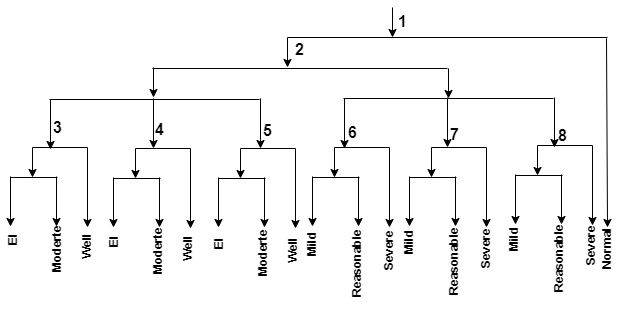

                                Multivariate linear model
                                                                                         
-----------------------------------------------------------------------------------------
        Intercept                Value         Num DF  Den DF       F Value        Pr > F
-----------------------------------------------------------------------------------------
           Wilks' lambda               -0.0000 2.0000 -1.0000 231744801740362.7188    nan
          Pillai's trace                1.0284 2.0000 -1.0000              18.1248    nan
  Hotelling-Lawley trace -450359962737050.6250 2.0000 -0.5000 112589990684262.6562    nan
     Roy's greatest root                0.0276 2.0000 -1.0000              -0.0138    nan
-----------------------------------------------------------------------------------------
                                                                                         
------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/multivariate/multivariate_ols.py:198: RuntimeWarning: invalid value encountered in power
  lmd = np.power(lmd, 1 / t)
